# Day 68

I'm going to continue my analysis from yesterday by bringing in data from seasons 1999-2021, filtering through Week 16, and doing a comparison to see how teams in 2022 are faring against history.  

Just a reminder, I'm looking at passing TD efficiency by dividing passing yards by number of passing touchdowns. From now on, when you reading yards and touchdowns, think passing instead of rushing.

In [28]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('deep')

# Create database connection
conn = sqlite3.connect('../../data/db/database_test.db')

## Team-Level: Yards per Touchdown (2022 Season through Week 16)

In [29]:
query = """
SELECT
    team,
    SUM(passing_yards) AS sum_pass_yds,
    SUM(passing_tds) AS sum_pass_tds,
    ROUND((SUM(passing_yards) / SUM(passing_tds)), 2) AS yds_per_pass_td
FROM
(
    SELECT
        team,
        week,
        SUM(passing_yards) AS passing_yards,
        SUM(passing_tds) AS passing_tds,
        ROUND((SUM(passing_yards) / SUM(passing_tds)), 2) AS yds_per_pass_td
    FROM
    (
        SELECT
            player_display_name AS player_name,
            recent_team AS team,
            week,
            passing_yards,
            passing_tds,
            (passing_yards / passing_tds) AS yds_per_pass_td
        FROM weekly
        WHERE position = 'QB'
            AND season = 2022
            AND week <= 16
    ) AS team_player_week_level
    GROUP BY team, week
) AS team_week_level
GROUP BY team
ORDER BY yds_per_pass_td ASC
"""

df = pd.read_sql(query, conn)
df

,team,sum_pass_yds,sum_pass_tds,yds_per_pass_td
0,CIN,4282.0,34,125.94
1,BUF,4037.0,32,126.16
2,KC,4720.0,37,127.57
3,CHI,2376.0,17,139.76
4,DAL,3501.0,25,140.04
5,GB,3517.0,25,140.68
6,SEA,3886.0,27,143.93
7,SF,3553.0,24,148.04
8,LV,3594.0,24,149.75
9,WAS,3471.0,23,150.91


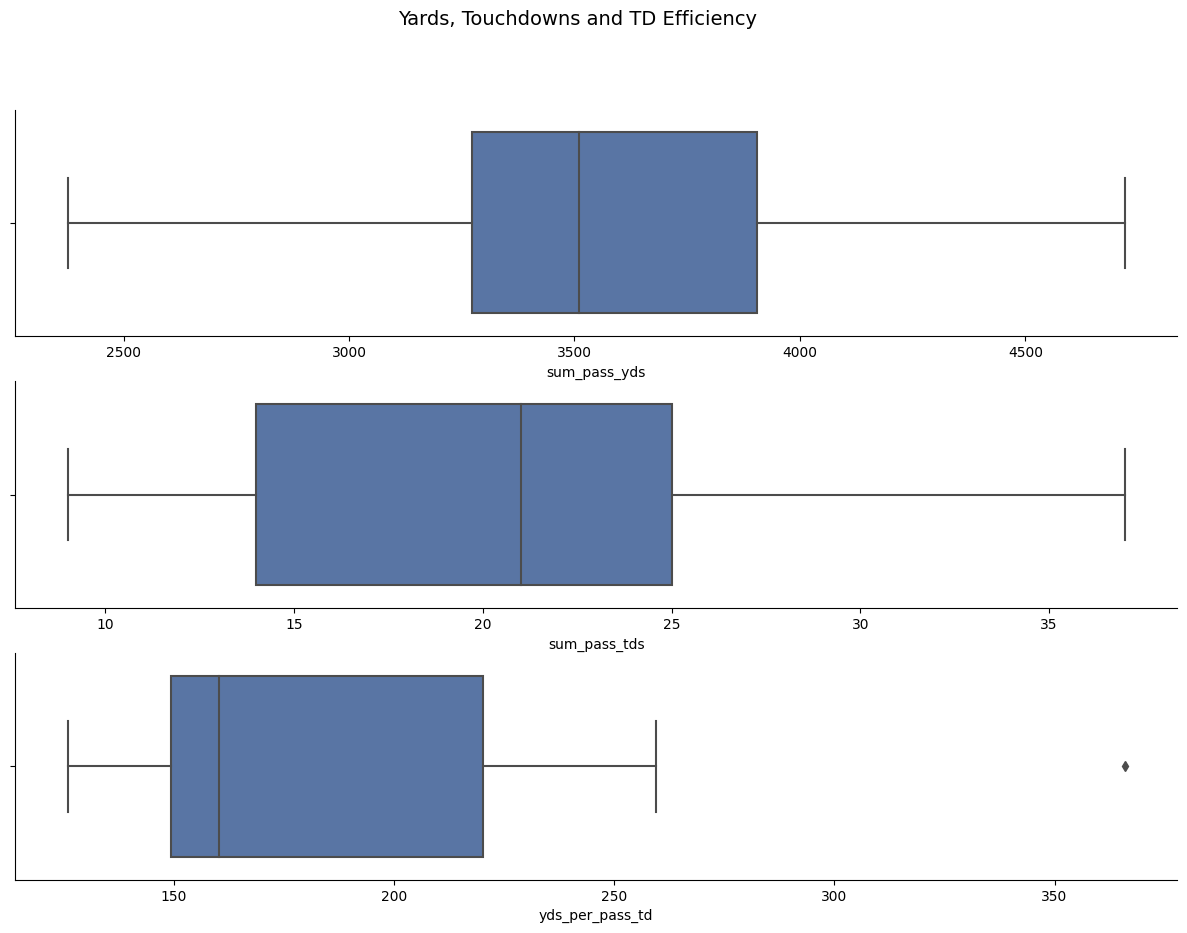

In [30]:
# Plot setup
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (15, 10))

plot_config = {
    'sum_pass_yds':ax0,
    'sum_pass_tds':ax1,
    'yds_per_pass_td':ax2,
}

# Plot
for col, ax in plot_config.items():
    sns.boxplot(x=col,
                data=df,
                # whis=[5,95],
                ax=ax)

# Add Title
fig.suptitle('Yards, Touchdowns and TD Efficiency', size=14)

sns.despine()
plt.show()

## Team-Level: Yards per Touchdown (1999-2021 Seasons through Week 16)

In [31]:
query = """
SELECT
    team,
    SUM(passing_yards) AS sum_pass_yds,
    SUM(passing_tds) AS sum_pass_tds,
    ROUND((SUM(passing_yards) / SUM(passing_tds)), 2) AS yds_per_pass_td
FROM
(
    SELECT
        team,
        week,
        SUM(passing_yards) AS passing_yards,
        SUM(passing_tds) AS passing_tds,
        ROUND((SUM(passing_yards) / SUM(passing_tds)), 2) AS yds_per_pass_td
    FROM
    (
        SELECT
            player_display_name AS player_name,
            recent_team AS team,
            week,
            passing_yards,
            passing_tds,
            (passing_yards / passing_tds) AS yds_per_pass_td
        FROM weekly
        WHERE position = 'QB'
            AND season < 2022
            AND week <= 16
    ) AS team_player_week_level
    GROUP BY team, week
) AS team_week_level
GROUP BY team
ORDER BY yds_per_pass_td ASC
"""

df = pd.read_sql(query, conn)
df

,team,sum_pass_yds,sum_pass_tds,yds_per_pass_td
0,GB,90098.0,663,135.89
1,IND,90831.0,628,144.64
2,SEA,78919.0,539,146.42
3,NO,94319.0,643,146.69
4,NE,89433.0,599,149.30
5,LAC,87591.0,564,155.30
6,DAL,83594.0,536,155.96
7,PHI,84589.0,530,159.60
8,MIN,81600.0,510,160.00
9,PIT,84253.0,523,161.10


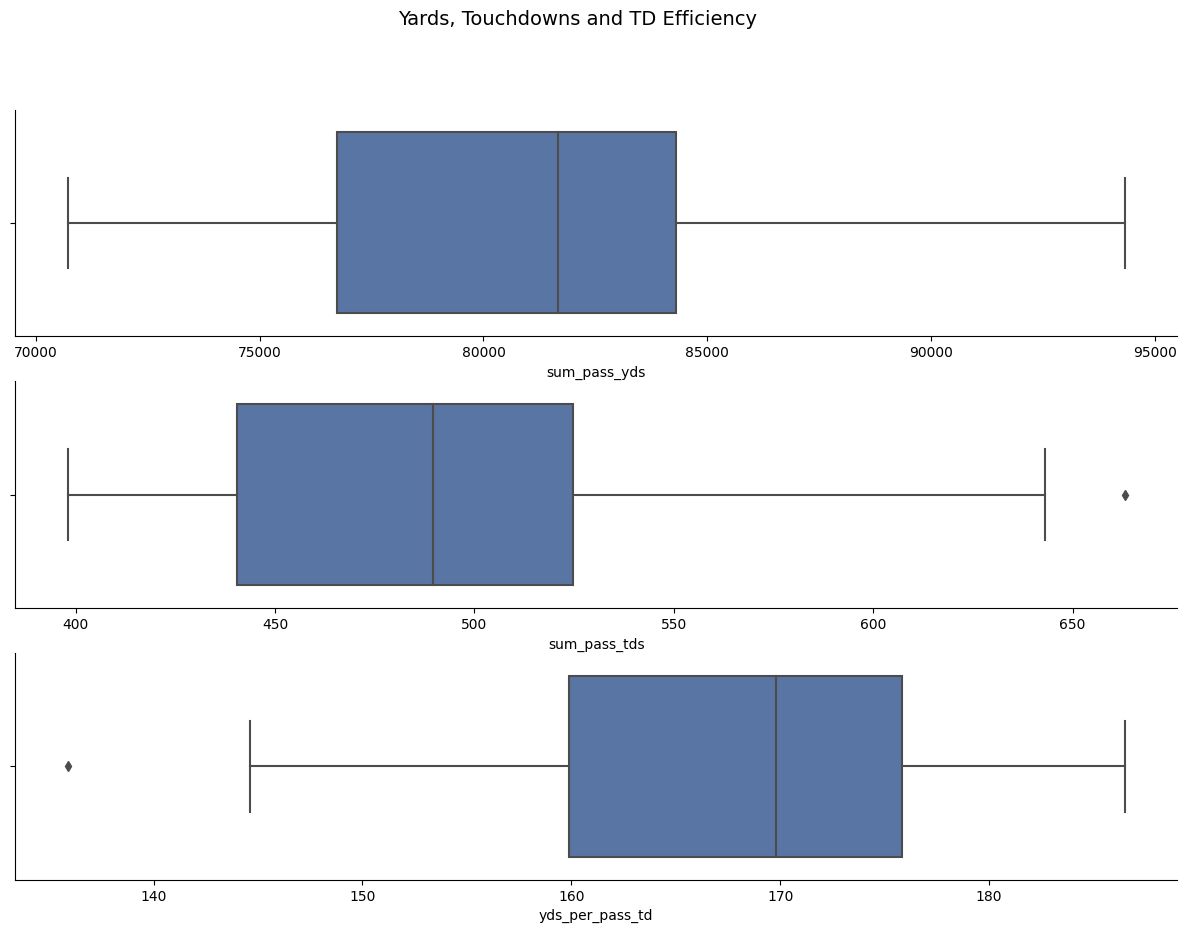

In [32]:
# Plot setup
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (15, 10))

plot_config = {
    'sum_pass_yds':ax0,
    'sum_pass_tds':ax1,
    'yds_per_pass_td':ax2,
}

# Plot
for col, ax in plot_config.items():
    sns.boxplot(x=col,
                data=df,
                # whis=[5,95],
                ax=ax)

# Add Title
fig.suptitle('Yards, Touchdowns and TD Efficiency', size=14)

sns.despine()
plt.show()

When I look at passing yards per passing touchdown at a team level, historically, there isn't much variation. Green Bay's efficiency, at 136 yards per passing touchdown is technically an outlier, and should be applauded, but it doesn't give us a sense of the *variability* of the stat.  

For example, we know that for 2022, Pittsburgh is throwing for 366 yards for every passing TD. That's ~2.7x Green Bay's historical numbers. But is that really so bad? Pittsburgh's historical average is 161. One can assume that they will revert to the mean at some point.  

I want to take a look at a team-season level to get a better understanding of this statistic.

## Team-Season Level: Yards per Touchdown (1999-2021 Seasons through Week 16)

In [33]:
query = """
SELECT
    team,
    season,
    SUM(passing_yards) AS sum_pass_yds,
    SUM(passing_tds) AS sum_pass_tds,
    ROUND((SUM(passing_yards) / SUM(passing_tds)), 2) AS yds_per_pass_td
FROM
(
    SELECT
        team,
        season,
        week,
        SUM(passing_yards) AS passing_yards,
        SUM(passing_tds) AS passing_tds,
        ROUND((SUM(passing_yards) / SUM(passing_tds)), 2) AS yds_per_pass_td
    FROM
    (
        SELECT
            player_display_name AS player_name,
            recent_team AS team,
            season, 
            week,
            passing_yards,
            passing_tds,
            (passing_yards / passing_tds) AS yds_per_pass_td
        FROM weekly
        WHERE position = 'QB'
            AND season < 2022
            AND week <= 16
    ) AS team_player_season_week_level
    GROUP BY team, season, week
) AS team_season_week_level
GROUP BY team, season
ORDER BY yds_per_pass_td ASC
"""

df = pd.read_sql(query, conn)
df

,team,season,sum_pass_yds,sum_pass_tds,yds_per_pass_td
0,BAL,2019,3256.0,37,88.00
1,GB,2020,4059.0,44,92.25
2,IND,2004,4558.0,49,93.02
3,NE,2007,4503.0,48,93.81
4,SEA,2018,3296.0,34,96.94
...,...,...,...,...,...
728,JAX,2021,3258.0,9,362.00
729,LA,2011,3032.0,8,379.00
730,LV,2006,2714.0,7,387.71
731,NE,2020,2801.0,7,400.14


In [34]:
df.describe()

,season,sum_pass_yds,sum_pass_tds,yds_per_pass_td
count,733.000000,733.000000,733.000000,733.000000
mean,2010.040928,3546.301501,21.489768,177.366971
std,6.620135,575.861804,7.097022,45.847339
min,1999.000000,979.000000,5.000000,88.000000
25%,2004.000000,3151.000000,17.000000,145.150000
50%,2010.000000,3526.000000,20.000000,169.320000
75%,2016.000000,3943.000000,26.000000,199.690000
max,2021.000000,5221.000000,51.000000,405.800000


### Notable Seasons

In [35]:
df.query("yds_per_pass_td > 400")

,team,season,sum_pass_yds,sum_pass_tds,yds_per_pass_td
731,NE,2020,2801.0,7,400.14
732,CIN,2000,2029.0,5,405.80


In [36]:
df.query("sum_pass_tds > 50")

,team,season,sum_pass_yds,sum_pass_tds,yds_per_pass_td
8,DEN,2013,5221.0,51,102.37


In [37]:
df.query("yds_per_pass_td <= 100")

,team,season,sum_pass_yds,sum_pass_tds,yds_per_pass_td
0,BAL,2019,3256.0,37,88.00
1,GB,2020,4059.0,44,92.25
2,IND,2004,4558.0,49,93.02
3,NE,2007,4503.0,48,93.81
4,SEA,2018,3296.0,34,96.94
5,PIT,2007,3172.0,32,99.13
6,PHI,2017,3794.0,38,99.84


In [38]:
df.query("sum_pass_yds < 1000")

,team,season,sum_pass_yds,sum_pass_tds,yds_per_pass_td
47,DEN,2011,979.0,8,122.38


This is the year that Tim Tebow threw the walk-off TD pass in OT to beat the Pittsburgh Steelers.

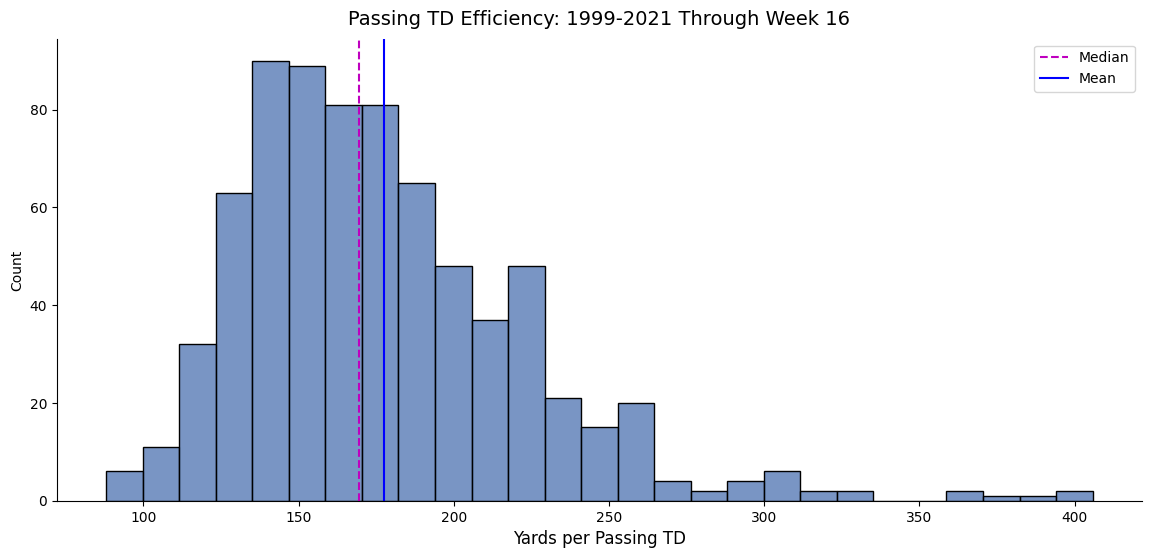

In [39]:
# Change plot size
fig = plt.figure(figsize = (14,6))
ax = fig.add_subplot()

g = sns.histplot(
    x='yds_per_pass_td',
    data=df,
    fill=True,
    ax=ax
)

# Add vertical lines
ax.axvline(x=df['yds_per_pass_td'].median(), color='m', label='Median', linestyle='--', linewidth=1.5)
ax.axvline(x=df['yds_per_pass_td'].mean(), color='b', label='Mean', linestyle='-', linewidth=1.5)

# Add axis labels and title
g.set_xlabel("Yards per Passing TD", size=12)
# g.set_ylabel("Number of Listings", size=12)
g.set_title("Passing TD Efficiency: 1999-2021 Through Week 16", size=14, pad=10)

# Customize Plot
plt.legend()
# plt.grid(axis='y')
ax.set_axisbelow(True)

sns.despine()

plt.show()

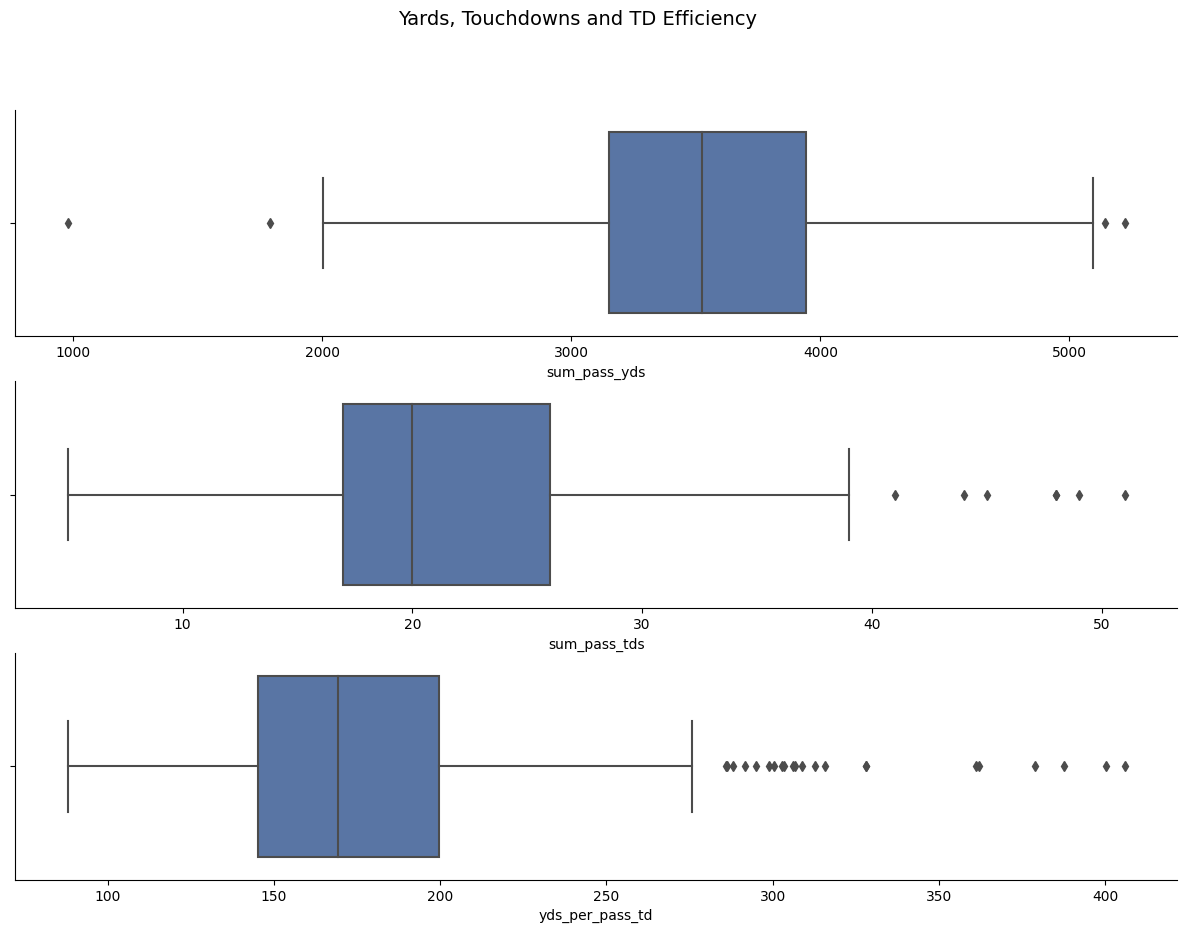

In [40]:
# Plot setup
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = (15, 10))

plot_config = {
    'sum_pass_yds':ax0,
    'sum_pass_tds':ax1,
    'yds_per_pass_td':ax2,
}

# Plot
for col, ax in plot_config.items():
    sns.boxplot(x=col,
                data=df,
                # whis=[5,95],
                ax=ax)

# Add Title
fig.suptitle('Yards, Touchdowns and TD Efficiency', size=14)

sns.despine()
plt.show()

As expected, variablility increased when we switched to team-season level. Here we see a number of outliers, all to the upper levels of this TD efficiency metric. This makes the distribution right-skewed. There are also noticeable clusters around 300 and 400 pass yards per passing TD.  

To give more context to 2022, in terms of effiency, only Pittsburgh, is having a historical season (in a bad way). With an efficiency of 366 yards per TD, their season is technically an outlier but not the worst. That award goes to Cincinnati in 2000 who needed to throw 405 passing yards for every passing touchdown.